**Roman Schiffino**

Spring 2024

CS 251: Data Analysis and Visualization

# Lab 3a | Linear Regression

## Task 1: Mystery Data 1

### 1a. Import the data

1. Import data '`data/mystery_data_1.csv'` (using your data class or [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html))
2. Print first 10 lines rows of data.

#### 1b. Using the following links and matplotlib documentation to view the data:
- [matplotlib](https://matplotlib.org/)
- [matplotlib hist](https://matplotlib.org/gallery/statistics/hist.html)
1. Create a figure with 3 subplots (each with a title):
    1. One scatterplot with column X on the x-axis and column Y on the y-axis.
    2. Two histograms: one for the X data, the other for the Y data. Use 10 bins in each histogram.

[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
(500, 2)

-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------


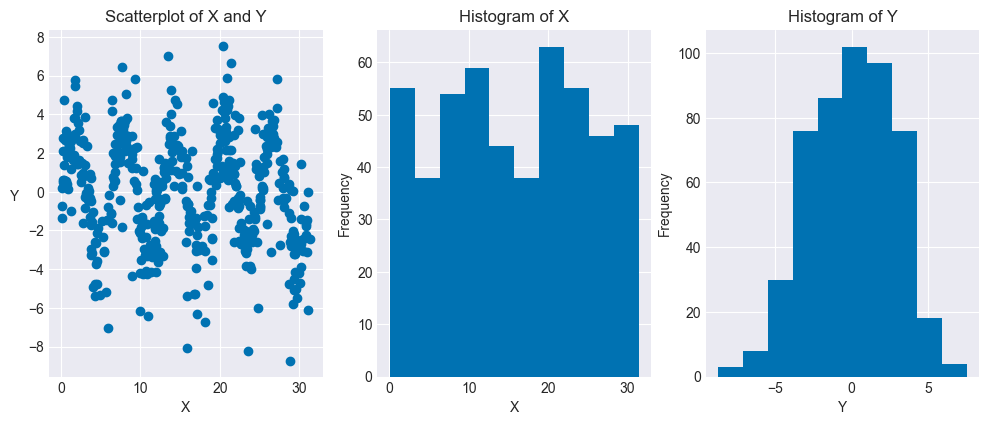

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.rcParams["figure.figsize"] = [12,4.5]

# Your code here
data = np.genfromtxt("data/mystery_data_1.csv", delimiter=",")[2:]
print(data[:10])
print(data.shape)

x_data = data[:,0]
y_data = data[:,1]

fig, ax = plt.subplots(1, 3)
scatter = ax[0]
hist1 = ax[1]
hist2 = ax[2]
scatter.scatter(x_data, y_data)
scatter.set_title("Scatterplot of X and Y")
scatter.set_xlabel("X")
scatter.set_ylabel("Y", rotation=0, labelpad=10)
hist1.hist(x_data, bins=10)
hist1.set_title("Histogram of X")
hist1.set_xlabel("X")
hist1.set_ylabel("Frequency")
hist2.hist(y_data, bins=10)
hist2.set_title("Histogram of Y")
hist2.set_xlabel("Y")
hist2.set_ylabel("Frequency")


print('''
-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------
''')

## Task 2: Analyze Mystery Data 1

### 2a. Use scipy to calculate the linear regression for Mystery Data 1 

Print first 10 lines rows of data.

Calculate the linear regression [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)
- The `a` parameter is the `A` array of independent data variables, the `b` parameter is the `y` array of the dependent variable values.
- Note that `A` matrix should include the column of 1s for the intercept. 
- Useful: [hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html), [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) and `np.newaxis` (or [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)).

**NOTE:** One of the things that `scipy.linalg.lstsq` returns is the **residues**, which is another name for the sum of all the squared errors (**SSE**). This is different than the residuals, which refer to just the set of errors (i.e. differences between value on regression curve and actual data sample), not their sum of squares.

Print the least-squares solved coefficients and residues.

Using the SSE, calculate and print the $R^2$ value using the following equations:

$R^2 = 1 - \frac{SSE}{smd}$

The square mean deviation: $smd = \sum_i^N \left ( y_i - \frac{1}{N} \sum_i^N y_i \right )^2$

In [10]:
import scipy.linalg as spl

# Your code here
print(data[:20])
dataArray = np.pad(x_data[:, np.newaxis], ((0, 0), (1, 0)), mode='constant', constant_values=1)
c, residuals, rank, singulars = spl.lstsq(dataArray, y_data)
print(f'Coefficients: {c}')
print(f'SSE: {residuals}')
smd = np.sum((y_data - np.mean(y_data))**2)
r2 = 1 - (residuals/smd)
print(f'r2: {r2}')

print('''
-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

SSE: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------
''')

[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]
 [ 7.269  1.883]
 [18.756  0.63 ]
 [ 1.163  2.235]
 [20.432  1.028]
 [10.113 -1.804]
 [25.021 -0.435]
 [17.094 -2.259]
 [10.92  -6.434]
 [29.149 -5.788]
 [18.998 -2.403]]
Coefficients: [ 0.92884793 -0.05650709]
SSE: 3722.8001542015754
r2: 0.033824411486558126

-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

SSE: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------


### 2b. Visualize linear regression results with matplotlib

1. Plot a scatterplot of the mystery data X on the x axis and Y on the y axis
2. Plot a line representing the linear regression
    1. For line_x, use [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create 100 points from the min x value to the max x value
    2. For line_y, multiply line_x by the slope and add the intercept
3. Include a title (with $R^2$ value), legend, x label and y label

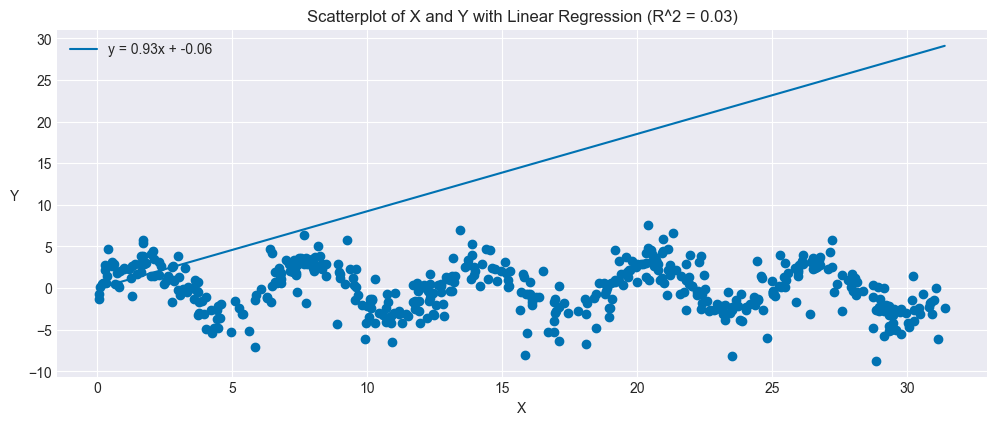

In [11]:
plt.scatter(x_data, y_data)
line_x = np.linspace(np.min(x_data), np.max(x_data), 100)
line_y = c[0]*line_x + c[1]
plt.plot(line_x, line_y, label=f"y = {c[0]:.2f}x + {c[1]:.2f}")
plt.title(f"Scatterplot of X and Y with Linear Regression (R^2 = {r2:.2f})")
plt.xlabel("X")
plt.ylabel("Y", rotation=0, labelpad=10)
plt.legend()
plt.show()

### 2c.  Interpret the results of the linear regression of the dataset 

**Question 1:** Interpret the results based on your plot and $R^2$ value. Is the linear regression model a good model for the data? **Why?**

**Answer 1:** 

The linear regression model is not at all a good model for the data.  $R^2$ is 0.03, which means that only about 3% of the variance $y$ can be explained by $x$. This is an abysmally low value. The scatterplot also shows that the data is not linear, and the linear regression line does not fit the data well at all. The data would probably be best fit by a sinusoidal regression line. Discrete FFT would be the best option available. In fact, Scipy probably has a function for that.

In [12]:
import scipy.fft as sfft
sort = x_data.argsort()
fft = sfft.rfft(y_data[sort])

fft: [ 2.21730000e+01+0.00000000e+00j -3.84001862e+01+7.54687044e+00j
 -5.78515758e+01-1.63202004e+02j  3.85789149e+00+1.89767418e+01j
 -3.54297464e+01-2.39053245e+01j  1.55461375e+00-7.20150520e+02j
 -4.71003263e+01-3.81093734e+01j -3.34898896e+01-2.83031765e+01j
  4.89081531e+01+1.15697508e+02j  2.65866055e+00-3.14814537e+01j
  3.13831665e+01+4.28184783e+01j  4.43615765e+01-3.72808973e+01j
 -9.50483843e+01-4.75582231e+01j -1.12198732e+01-7.59595590e+00j
  1.24654842e+01-5.87071362e+00j  4.95308470e+01+4.11728645e+01j
  8.71177806e+00-3.22599836e+01j  1.28650531e+01-2.94866464e+01j
  5.93704859e+00-1.53176331e+01j -2.67381171e+01-2.72269350e+01j
 -4.05946039e+01-6.22192258e+00j -1.14461855e-01-5.14990557e+01j
 -3.54060148e+01-3.87468044e+01j -4.01781883e+01-1.11619558e+01j
 -3.50515203e+01+1.66686797e+01j -1.21351750e+00-1.23916118e+01j
 -8.60142954e+01-1.03264199e+01j  3.65186212e+01-3.79978488e+01j
 -2.29233643e-01-1.58389188e+01j -3.88983998e+01+2.52160142e+00j
  5.06797229e+00+4.3

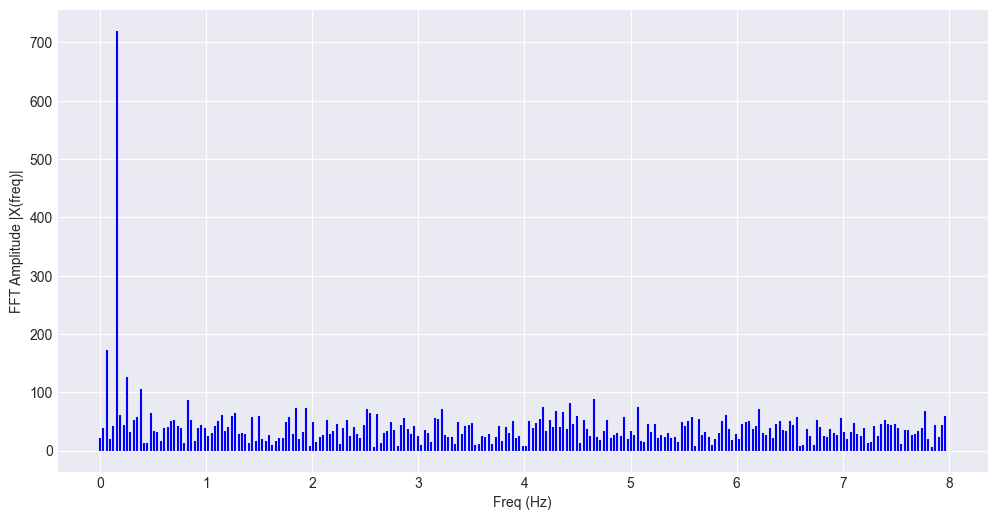

In [13]:
N = len(y_data)
n = np.linspace(x_data.min(), x_data.max(), len(x_data))
# get the sampling rate
sr = 1./(n[1] - n[0])
T = x_data.max() - x_data.min()
freq = sfft.rfftfreq(N,(n[1] - n[0]))

print(f"fft: {fft}")
print(f"n: {n}")
print(f"freq: {freq}")
print(f"sr: {sr}")
print(f"T: {T}")

plt.figure(figsize = (12, 6))
plt.vlines(freq, 0, np.abs(fft), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

maxIndex: [ 32  74 225 214  94 230 124 210  76 178 197 218 102  66  50 166 158  41
 240 152  43  92 168  42  57 188  97 121 196 115 217  68 224 241 107 153
 106 108 109 110  37  36  38 101 100  35  99 118  34 120  39 122  33  96
   1  40 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141  31
 143 144  93 146  91  30 149 150  29  90  58  89 155  27 157  87 159  26
  24 162 163 164  23  86  85  84  22  82  21 172 173 174 175  20 177  80
 179  79  19  17 183 184 185 186  16  78  15 190 191 192 193 194 195  45
  75 198  12 200 201 202 203 204 205 206  11  10 209  73   9 212 213  72
  47 216  70  69 219 220   8 222 223  67  63 226   7   6 229  55 231 232
 233 234 235 236   5 238 239  61  60 242 243 244   4   2 247  56 249 250]
Amplitude: [0.0984345  0.0989648  0.09962759 0.10037611 0.10302334 0.10217687
 0.10196443 0.10337917 0.11083266 0.10493825 0.10455817 0.10951497
 0.10394362 0.10751849 0.10596154 0.10877986 0.10877014 0.11037835
 0.10408502 0.10825489 0.1115429  0.11657796 0.

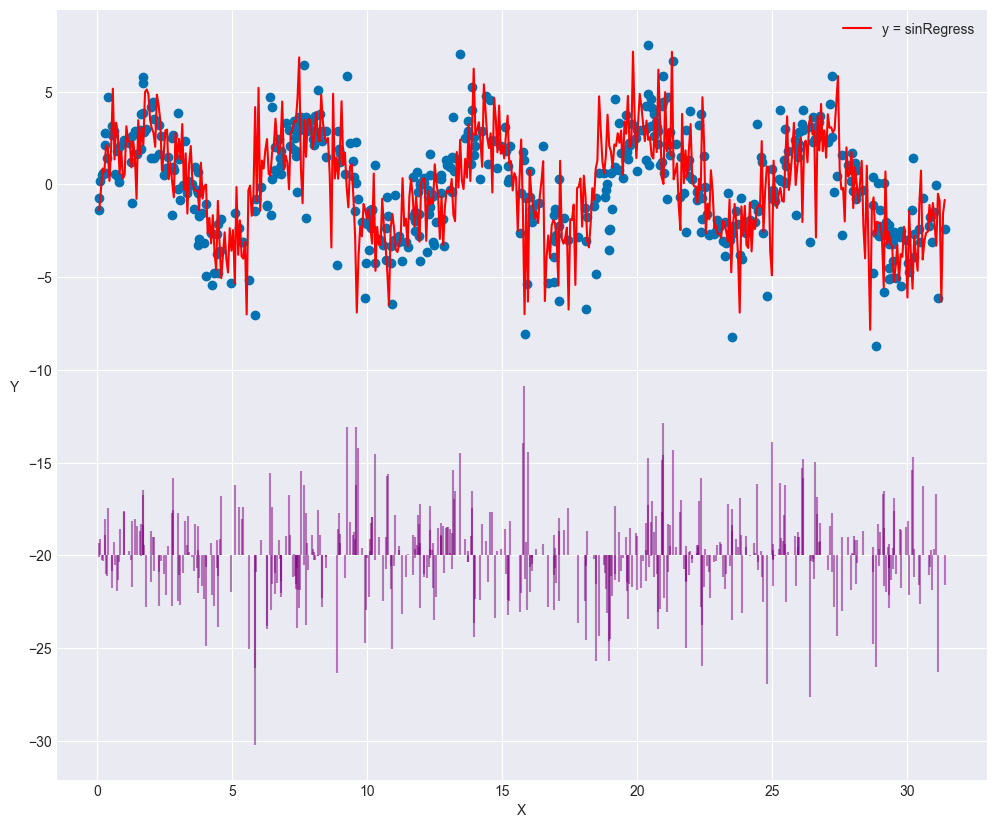

In [14]:
fftMag = 2*np.abs(fft)/N
fftPhase  = np.angle(fft)

# Index of max
maxIndex = np.argpartition(fftMag[:N//2+1], -180)[-180:]
print(f"maxIndex: {maxIndex}")

# Calculate the amplitude
amps = fftMag[maxIndex]
# Calculate the frequency
maxFreq = freq[maxIndex]
# Calculate the phase shift
phaseShift = fftPhase[maxIndex] + np.pi/2
# Calculate the period
maxPeriod = 1./maxFreq
# Calculate the wavelength
maxWavelength = (1./maxFreq)/(2.*np.pi)

print(f"Amplitude: {amps}")
print(f"Frequency: {maxFreq}")
print(f"Phase: {phaseShift}")
print(f"Period: {maxPeriod}")
print(f"Wavelength: {maxWavelength}")


line_x = n
n_ = n[:, np.newaxis]
line_y = np.sum(amps * np.sin(2*np.pi*maxFreq*n_ + phaseShift), axis=1)
x_data_ = x_data[sort][:, np.newaxis]
line_y_ = np.sum(amps * np.sin(2*np.pi*maxFreq*x_data_ + phaseShift), axis=1)
label_comp = "y = sinRegress"
print(y_data.shape)
print(line_y_.shape)
residue = np.einsum('i,i->', y_data[sort] - line_y_, y_data[sort] - line_y_)
print(f"Residue: {residue}")
mean = np.mean(y_data[sort])
smd = np.einsum('i,i->', y_data[sort] - mean, y_data[sort] - mean)
r2 = 1 - (residue/smd)
print(f"smd: {smd}")
print(f"r2: {r2}")
plt.figure(figsize = (12, 10))
plt.plot(line_x, line_y, "r", label=label_comp)
plt.scatter(x_data, y_data)
plt.vlines(x_data[sort], -20, -20+(y_data[sort]-line_y_), color='purple', alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y", rotation=0, labelpad=10)
plt.legend()
plt.show()

maxIndex: [146  12   5   2   8]
Amplitude: [0.35592222 0.42513019 2.88060879 0.69260897 0.50244077]
Frequency: [4.65253209 0.3823999  0.15933329 0.06373332 0.25493327]
Phase: [ 2.56839826e+00 -1.10686233e+00  2.15873112e-03 -3.40658849e-01
  2.74165108e+00]
Period: [ 0.21493672  2.61506346  6.2761523  15.69038076  3.92259519]
Wavelength: [0.03420824 0.41620028 0.99888066 2.49720166 0.62430041]
(500,)
(500,)
Residue: 1711.7171902060823
smd: 3853.130009142
r2: 0.5557592953923606


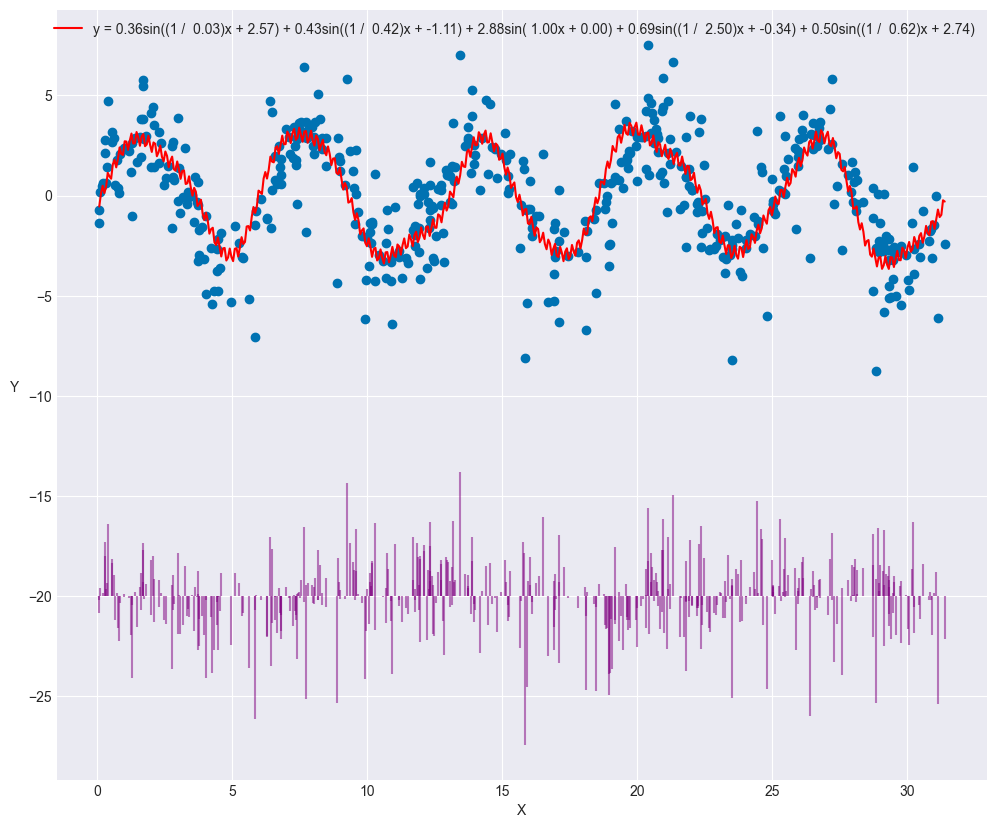

In [15]:
# Index of max
maxIndex = np.argpartition(fftMag[:N//2], -5)[-5:]
print(f"maxIndex: {maxIndex}")

# Calculate the amplitude
amps = fftMag[maxIndex]
# Calculate the frequency
maxFreq = freq[maxIndex]
# Calculate the phase shift
phaseShift = fftPhase[maxIndex] + np.pi/2
# Calculate the period
maxPeriod = 1./maxFreq
# Calculate the wavelength
maxWavelength = (1./maxFreq)/(2.*np.pi)

print(f"Amplitude: {amps}")
print(f"Frequency: {maxFreq}")
print(f"Phase: {phaseShift}")
print(f"Period: {maxPeriod}")
print(f"Wavelength: {maxWavelength}")


line_y = np.sum(amps * np.sin(2*np.pi*maxFreq*n_ + phaseShift), axis=1)
x_data_ = x_data[sort][:, np.newaxis]
line_y_ = np.sum(amps * np.sin(2*np.pi*maxFreq*x_data_ + phaseShift), axis=1)
label_preComp = [f"{amps[i]:.2f}sin({f'(1 / {maxWavelength[i]: .2f})' if np.floor(1./maxWavelength[i]) != np.round(1./maxWavelength[i], 2) else f'{(1./maxWavelength[i]): .2f}'}x + {phaseShift[i]:.2f})" for i in range(len(amps))]
label_comp = "y = " + " + ".join(label_preComp)
print(y_data.shape)
print(line_y_.shape)
residue = np.einsum('i,i->', y_data[sort] - line_y_, y_data[sort] - line_y_)
print(f"Residue: {residue}")
r2 = 1 - (residue/smd)
print(f"smd: {smd}")
print(f"r2: {r2}")
plt.figure(figsize = (12, 10))
plt.plot(line_x, line_y, "r", label=label_comp)
plt.scatter(x_data, y_data)
plt.vlines(x_data[sort], -20, -20+(y_data[sort]-line_y_), color='purple', alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y", rotation=0, labelpad=10)
plt.legend()
plt.show()

maxIndex: [5]
Amplitude: [2.88060879]
Frequency: [0.15933329]
Phase: [0.00215873]
Period: [6.2761523]
Wavelength: [0.99888066]
Residue: 1560.7050558943674
smd: 3853.130009142
r2: 0.59495136364685


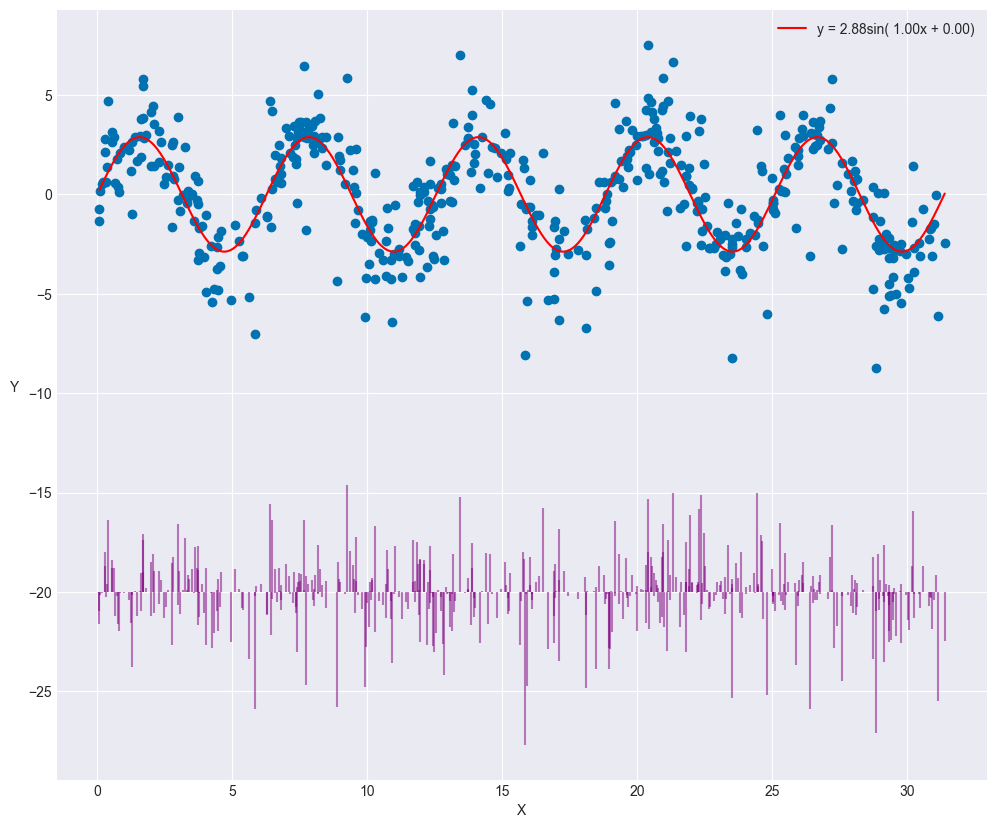

In [16]:
# Index of max
maxIndex = np.argpartition(fftMag[:N//2+1], -1)[-1:]
print(f"maxIndex: {maxIndex}")

# Calculate the amplitude
amps = fftMag[maxIndex]
# Calculate the frequency
maxFreq = freq[maxIndex]
# Calculate the phase shift
phaseShift = fftPhase[maxIndex] + np.pi/2
# Calculate the period
maxPeriod = 1./maxFreq
# Calculate the wavelength
maxWavelength = (1./maxFreq)/(2.*np.pi)

print(f"Amplitude: {amps}")
print(f"Frequency: {maxFreq}")
print(f"Phase: {phaseShift}")
print(f"Period: {maxPeriod}")
print(f"Wavelength: {maxWavelength}")


line_y = np.sum(amps * np.sin(2*np.pi*maxFreq*n_ + phaseShift), axis=1)
x_data_ = x_data[sort][:, np.newaxis]
line_y_ = np.sum(amps * np.sin(2*np.pi*maxFreq*x_data_ + phaseShift), axis=1)

label_preComp = [f"{amps[i]:.2f}sin({f'(1 / {maxWavelength[i]: .2f})' if np.floor(1./maxWavelength[i]) != np.round(1./maxWavelength[i], 2) else f'{(1./maxWavelength[i]): .2f}'}x + {phaseShift[i]:.2f})" for i in range(len(amps))]
label_comp = "y = " + " + ".join(label_preComp)
residue = np.einsum('i,i->', y_data[sort] - line_y_, y_data[sort] - line_y_)
print(f"Residue: {residue}")
r2 = 1 - (residue/smd)
print(f"smd: {smd}")
print(f"r2: {r2}")
plt.figure(figsize = (12, 10))
plt.plot(line_x, line_y, "r", label=label_comp)
plt.scatter(x_data, y_data)
plt.vlines(x_data[sort], -20, -20+(y_data[sort]-line_y_), color='purple', alpha=0.5)
plt.xlabel("X")
plt.ylabel("Y", rotation=0, labelpad=10)
plt.legend()
plt.show()

Clearly, the data is not linear. The linear regression line did not fit. The sinusoidal regression line fits much better. Our best $R^2$ value is 0.59495136364685, which means that 59% of the variance in $y$ can be explained by $x$. This is quite a high value, and the plots reflect this. The sinusoidal regression line fits the data very well. 

However, there is more to this picture. We tried sine regressions with 1, 5, and 180 components. The 180 component sine regression line fits the data the worst, with an $R^2$ value of 0.24195410038997922. The 5 component sine regression line fits the data the second best, with an $R^2$ value of 0.5557592953923606. The 1 component sine regression line fits the data the best, with an $R^2$ value of 0.59495136364685. What this likely tells us is that the data was generated or is best fit by a single sine wave and had random noise added in a non-sinusoidal manner.